In [1]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

**Входные данные:** Имеется набор проекций записей речи, произнесённых с определённой эмоцией.

**Обьём данных:** 48 записей, 12 различных эмоций.

**Требуется:** найти связь между проекциями и эмоцией, а также выявить влияние каждой компоненты проекции на определённую эмоцию.

In [2]:
emotion_to_index = {
    'gnev': 0,
    'gore': 1,
    'liubov': 2,
    'neitralino': 3,
    'onvrashenie': 4,
    'prezrenie': 5,
    'radost': 6,
    'trevoga': 7,
    'udivlenie': 8,
    'uzas': 9,
    'vina': 10,
    'zastenchivost': 11
}

emotion_to_russian = {
    'gnev': 'гнев',
    'gore': 'горе',
    'liubov': 'любовь',
    'neitralino': 'нейтрально',
    'onvrashenie': 'отвращение',
    'prezrenie': 'презрение',
    'radost': 'радость',
    'trevoga': 'тревога',
    'udivlenie': 'удивление',
    'uzas': 'ужас',
    'vina': 'вина',
    'zastenchivost': 'застенчивость'
}

index_to_russian = {
    0: 'гнев',
    1: 'горе',
    2: 'любовь',
    3: 'нейтрально',
    4: 'отвращение',
    5: 'презрение',
    6: 'радость',
    7: 'тревога',
    8: 'удивление',
    9: 'ужас',
    10: 'вина',
    11: 'застенчивость'
}

In [5]:
folder_path = '../projections'
dataframes = []
raw_data = []
stat_data = []
stat_shared_data = []
index_to_filename = {}

for i, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        index_to_filename[i] = filename
        emotion = filename.split('_')[-1].split('.')[0]
        emotion_idx = emotion_to_index[emotion]
        
        # Чтение CSV
        df = pd.read_csv(file_path)
        
        # Подготовка признакового пространства
        features = []
        stat_features = []
        feature_row_len = 0

        for row in df:
            feature_row = np.array(df[row])
            feature_row_len = len(feature_row)
            stat_features.append(np.mean(feature_row))
            stat_features.append(np.std(feature_row))
            features.append(np.array(df[row]))
        for i in range(0, len(feature_row) - 50, 25):
            stat_shared_features = []
            for row in df:
                feature_row = np.array(df[row])
                shared_feature_row = feature_row[i:i+50]
                stat_shared_features.append(np.mean(shared_feature_row))
                stat_shared_features.append(np.std(shared_feature_row))
            stat_shared_features = np.array(stat_shared_features)
            stat_shared_data.append((stat_shared_features, emotion_idx))
        
        features = np.array(features)
        stat_features = np.array(stat_features)

        raw_data.append((features, emotion_idx))
        stat_data.append((stat_features, emotion_idx))
        
        # Добавляем DataFrame в список
        dataframes.append(df)

In [6]:
len(stat_shared_data), len(stat_data)

(601, 48)

In [7]:
def draw_raw_data(data, length):
    """data - список данных длины length"""
    for i in range(length):
        fig = go.Figure()
        matrix = data[i][0]
        for component in range(matrix.shape[0]):
            func = matrix[component]
            trace = go.Scatter(x=np.arange(len(func)), y=func, mode='lines', name=f'Компонента {component+1}')
            fig.add_trace(trace)
            emotion_russian = index_to_russian[data[i][1]]
        fig.update_layout(title=f'График проекции, эмоция: {emotion_russian}', xaxis_title='Время', yaxis_title='Значение компоненты')
        fig.show()

In [8]:
draw_raw_data([raw_data[0]], 1)

### Проблема: в сырых данных много пропусков. Обучать модель на таких данных нельзя. Избавимся от пропусков.

In [9]:
index_to_range = {
    0: [(10, 160), (225, 350)],
    1: [(60, 365)],
    2: [(7, 120), (160, 245)],
    3: [(48, 157), (176, 271)],
    4: [(65, 180), (200, 290)],
    5: [(8, 93), (113, 197), (220, 306)],
    6: [(44, 172), (201, 303)],
    7: [(7, 287)],
    8: [(5, 170), (210, 360)],
    9: [(57, 267)],
    10: [(45, 144), (160, 245)],
    11: [(176, 440)],
    12: [(36, 330)],
    13: [(7, 240)],
    14: [(6, 119), (135, 227)],
    15: [(47, 180), (206, 330)],
    16: [(68, 186), (212, 320)],
    17: [(42, 144), (165, 264)],
    18: [(5, 260)],
    19: [(6, 109), (132, 213)],
    20: [(4, 146), (172, 284)],
    21: [(55, 340)],
    22: [(4, 210)],
    23: [(46, 364)],
    24: [(9, 96), (131, 230)],
    25: [(61, 404)],
    26: [(6, 172), (217, 355)],
    27: [(4, 235)],
    28: [(11, 300)],
    29: [(79, 214), (250, 365)],
    30: [(3, 147), (189, 323)],
    31: [(3, 120), (150, 238)],
    32: [(3, 117), (130, 225)],
    33: [(10, 270)],
    34: [(88, 190), (214, 305)],
    35: [(50, 245)],
    36: [(112, 250), (284, 395)],
    37: [(7, 175), (229, 373)],
    38: [(6, 171), (206, 332)],
    39: [(64, 213), (234, 339)],
    40: [(70, 202), (238, 346)],
    41: [(4, 181)],
    42: [(42, 242)],
    43: [(3, 197)],
    44: [(85, 287)],
    45: [(8, 250)],
    46: [(3, 212)],
    47: [(108, 394)]
}

##### Идея на будущее - использовать пропуски как особое состояние и обучать модель на всех данных. Хотим увидеть результат, когда модель сможет самостоятельно обнаруживать пропуски и обрабатывать их.

In [10]:
index_to_features = {}
for i, data in enumerate(raw_data):
    matrix = data[0]
    emotion_index = data[1]
    data_ranges = index_to_range[i]

    if emotion_index not in index_to_features:
        index_to_features[emotion_index] = None
    
    for data_range in data_ranges:
        start, end = data_range
        submatrix = matrix[:, start:(end+1)]
        if index_to_features[emotion_index] is None:
            index_to_features[emotion_index] = submatrix
        else:
            index_to_features[emotion_index] = np.hstack((index_to_features[emotion_index], submatrix))

In [11]:
def draw_merged_data(index_to_features):
    for index in index_to_features:
        matrix = index_to_features[index]
        emotion_russian = index_to_russian[index]
        fig = go.Figure()
        for component in range(matrix.shape[0]):
            func = matrix[component]
            trace = go.Scatter(x=np.arange(len(func)), y=func, mode='lines', name=f'Компонента {component+1}')
            fig.add_trace(trace)
        fig.update_layout(title=f'График проекции, эмоция: {emotion_russian}', xaxis_title='Время', yaxis_title='Значение компоненты')
        fig.show()

In [12]:
draw_merged_data(index_to_features)

In [13]:
X = []
y = []

step = 50
delta = 25

for index, matrix in index_to_features.items():
    for i in range(0, matrix.shape[1]-step, delta):
        submatrix = matrix[:, i:i+step]
        subfeatures_mean = np.mean(submatrix, axis=1)
        subfeatures_std = np.std(submatrix, axis=1)
        subfeatures = []
        for m, s in zip(subfeatures_mean, subfeatures_std):
            subfeatures.append(m)
            subfeatures.append(s)
        subfeatures = np.array(subfeatures)
        X.append(subfeatures)
        y.append(index)

X = np.array(X)
y = np.array(y)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test size: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (360, 30)
y_train shape: (360,)
X_test size: (91, 30)
y_test shape: (91,)


##### Метод опорных векторов:

In [73]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def train_svc_and_get_acc(kernel='linear', C=1.0):
    model = SVC(kernel=kernel, C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

for kernel in ['linear', 'rbf', 'poly']:
    for c in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0, 50.0, 75.0, 100.0, 150.0]:
        accuracy = train_svc_and_get_acc(kernel=kernel, C=c)
        print(f'SVC: kernel = {kernel}, C = {c}, accuracy: {accuracy}')
    print('-'*20)

SVC: kernel = linear, C = 0.001, accuracy: 0.4835164835164835
SVC: kernel = linear, C = 0.005, accuracy: 0.4725274725274725
SVC: kernel = linear, C = 0.01, accuracy: 0.4945054945054945
SVC: kernel = linear, C = 0.05, accuracy: 0.43956043956043955
SVC: kernel = linear, C = 0.1, accuracy: 0.4175824175824176
SVC: kernel = linear, C = 0.5, accuracy: 0.45054945054945056
SVC: kernel = linear, C = 1.0, accuracy: 0.45054945054945056
SVC: kernel = linear, C = 2.0, accuracy: 0.4725274725274725
SVC: kernel = linear, C = 5.0, accuracy: 0.4725274725274725
SVC: kernel = linear, C = 10.0, accuracy: 0.4725274725274725
SVC: kernel = linear, C = 15.0, accuracy: 0.4725274725274725
SVC: kernel = linear, C = 20.0, accuracy: 0.4725274725274725
SVC: kernel = linear, C = 30.0, accuracy: 0.4725274725274725
SVC: kernel = linear, C = 50.0, accuracy: 0.4725274725274725
SVC: kernel = linear, C = 75.0, accuracy: 0.4725274725274725
SVC: kernel = linear, C = 100.0, accuracy: 0.4725274725274725
SVC: kernel = linear, C

##### Случайный лес:

In [74]:
from sklearn.ensemble import RandomForestClassifier

def train_random_forest_and_get_acc(n_estimators=100):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

for n_estimators in [10, 25, 50, 75, 100, 150, 200, 250, 500, 750, 1000, 1250, 1500]:
    accuracy = train_random_forest_and_get_acc(n_estimators=n_estimators)
    print(f'RandomForest: n_estimators = {n_estimators}, accuracy: {accuracy}')

RandomForest: n_estimators = 10, accuracy: 0.3956043956043956
RandomForest: n_estimators = 25, accuracy: 0.4945054945054945
RandomForest: n_estimators = 50, accuracy: 0.5384615384615384
RandomForest: n_estimators = 75, accuracy: 0.5494505494505495
RandomForest: n_estimators = 100, accuracy: 0.5604395604395604
RandomForest: n_estimators = 150, accuracy: 0.5714285714285714
RandomForest: n_estimators = 200, accuracy: 0.5714285714285714
RandomForest: n_estimators = 250, accuracy: 0.5604395604395604
RandomForest: n_estimators = 500, accuracy: 0.5054945054945055
RandomForest: n_estimators = 750, accuracy: 0.5164835164835165
RandomForest: n_estimators = 1000, accuracy: 0.5274725274725275
RandomForest: n_estimators = 1250, accuracy: 0.5604395604395604
RandomForest: n_estimators = 1500, accuracy: 0.5494505494505495


##### Градиентный бустинг:

In [16]:
from catboost import CatBoostClassifier

In [75]:
def train_catboost_and_get_acc(iterations=500, depth=6, learning_rate=0.1):
    model = CatBoostClassifier(iterations=iterations, depth=depth, learning_rate=learning_rate,
                               loss_function='MultiClass', verbose=False)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

for depth in [5, 6]:
    for lr in [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]:
        accuracy = train_catboost_and_get_acc(1000, depth, lr)
        print(f'CatBoost: depth = {depth}, learning_rate = {lr}, accuracy: {accuracy}')
    print('-'*20)

CatBoost: depth = 5, learning_rate = 0.01, accuracy: 0.5274725274725275
CatBoost: depth = 5, learning_rate = 0.05, accuracy: 0.5824175824175825
CatBoost: depth = 5, learning_rate = 0.1, accuracy: 0.5604395604395604
CatBoost: depth = 5, learning_rate = 0.2, accuracy: 0.5604395604395604
CatBoost: depth = 5, learning_rate = 0.5, accuracy: 0.6263736263736264
CatBoost: depth = 5, learning_rate = 1.0, accuracy: 0.5274725274725275
--------------------
CatBoost: depth = 6, learning_rate = 0.01, accuracy: 0.5604395604395604
CatBoost: depth = 6, learning_rate = 0.05, accuracy: 0.5604395604395604
CatBoost: depth = 6, learning_rate = 0.1, accuracy: 0.5714285714285714
CatBoost: depth = 6, learning_rate = 0.2, accuracy: 0.5384615384615384
CatBoost: depth = 6, learning_rate = 0.5, accuracy: 0.5384615384615384
CatBoost: depth = 6, learning_rate = 1.0, accuracy: 0.5604395604395604
--------------------


##### Лучший результат:
**CatBoost: depth = 5, iterations = 1000, learning_rate = 0.1, accuracy: 0.5934**

##### Изучим влияние признаков на поведение модели для определённой эмоции:

In [17]:
model = CatBoostClassifier(iterations=1000, depth=5, learning_rate=0.1,
                           loss_function='MultiClass', verbose=False)
model.fit(X_train, y_train)

In [18]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

feature_names = []
for i in range(15):
    feature_names.append(f'Компонента {i+1}, среднее')
    feature_names.append(f'Компонента {i+1}, дисперсия')

def draw_shap(class_index):
    print(f'Эмоция - {index_to_russian[class_index]}')
    shap.summary_plot(shap_values[class_index], X_test, plot_type='dot',
                      feature_names=feature_names, plot_size=(7,9), max_display=30)

Эмоция - гнев


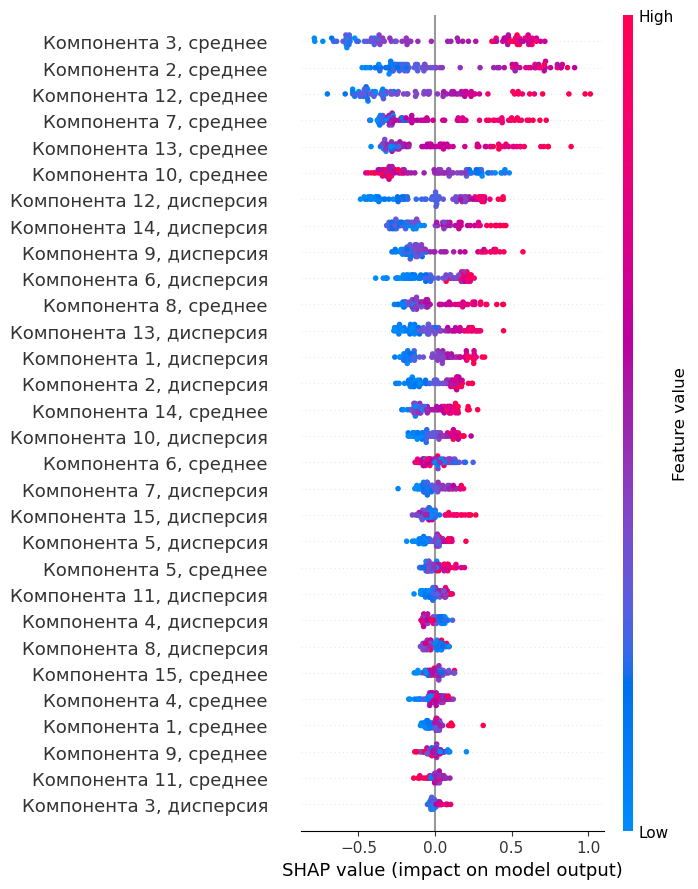

In [19]:
draw_shap(0)

Эмоция - горе


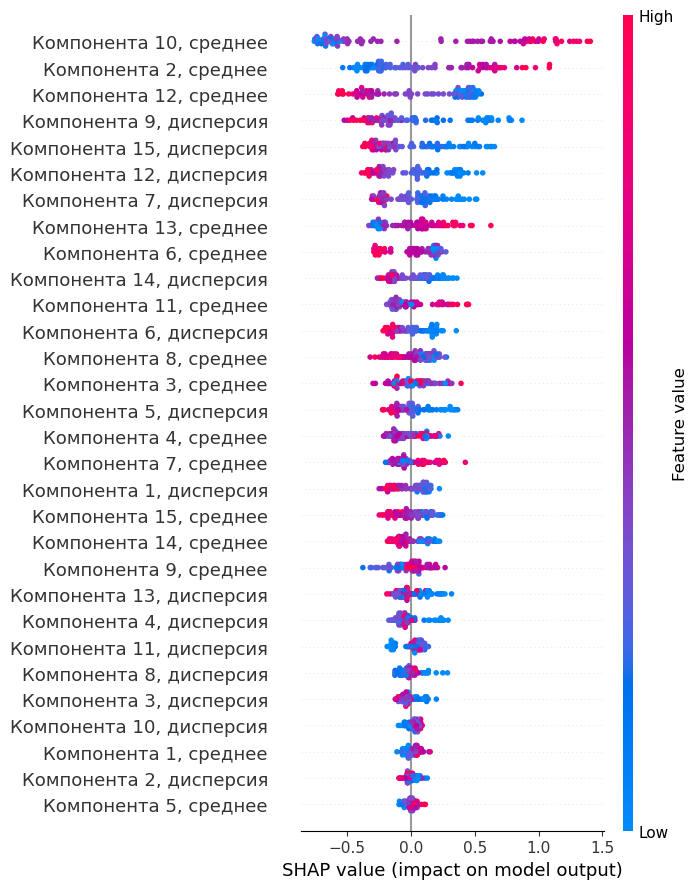

In [20]:
draw_shap(1)

Эмоция - любовь


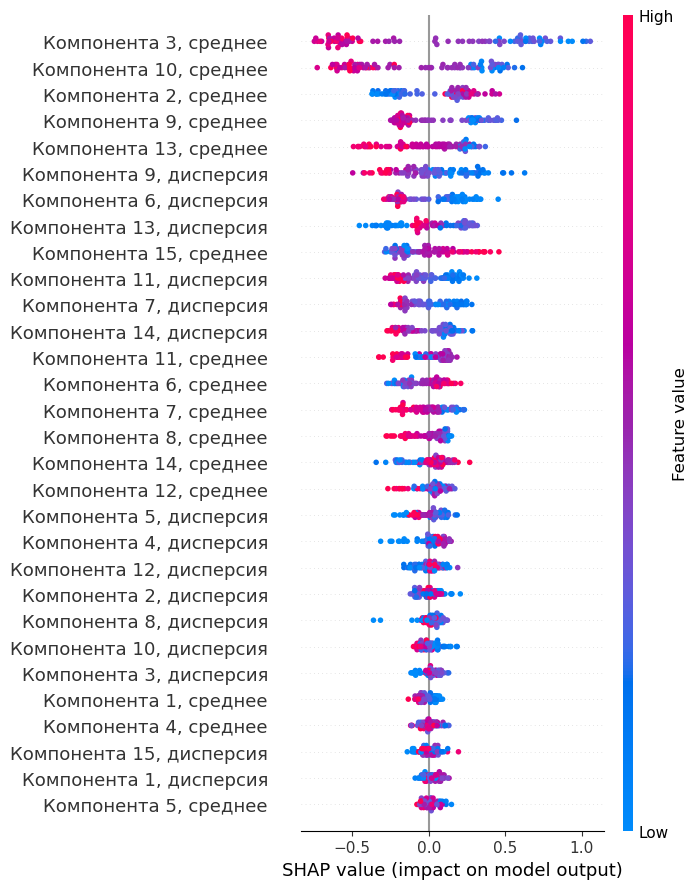

In [21]:
draw_shap(2)

Эмоция - нейтрально


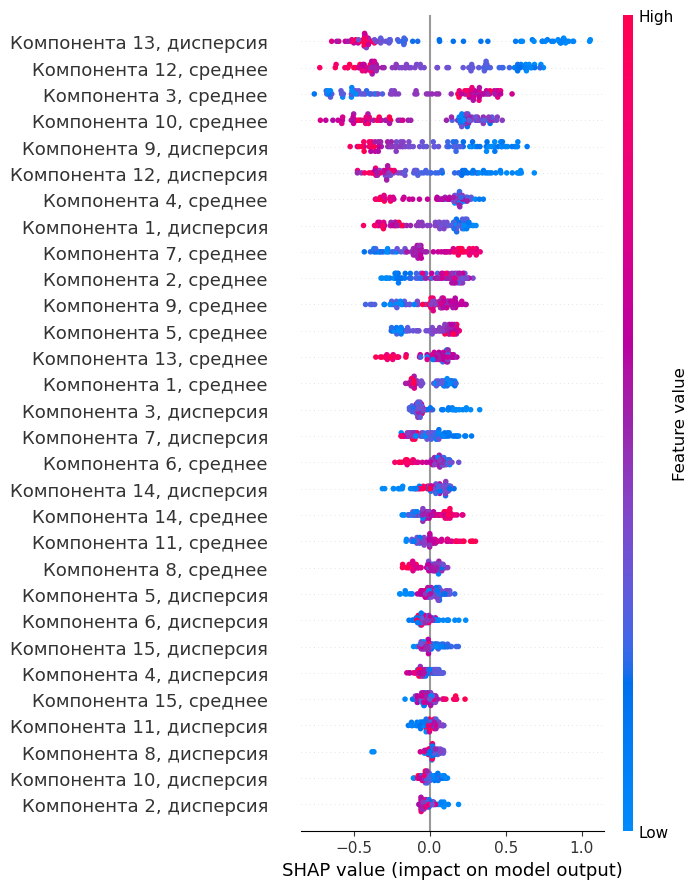

In [22]:
draw_shap(3)

Матрица зависимостей компонент проекции от эмоции

In [32]:
class_index = 0

emotion = index_to_russian[class_index]
shap_values[class_index]

array([[-0.02298971, -0.17297504, -0.29489653, ...,  0.0609166 ,
        -0.01422137, -0.04184697],
       [-0.05431059, -0.17848254, -0.06670384, ..., -0.19256914,
         0.02217401, -0.02138933],
       [ 0.03115515,  0.01534825,  0.83115486, ..., -0.19723245,
         0.0240994 , -0.04034505],
       ...,
       [-0.03531929, -0.20023816, -0.19862641, ..., -0.31097509,
         0.0894751 , -0.03400985],
       [-0.02547868,  0.0364819 ,  0.53314918, ..., -0.11838973,
        -0.0268312 , -0.09138855],
       [ 0.02649799,  0.19192808, -0.42277674, ...,  0.13216725,
         0.01276602,  0.06563808]])

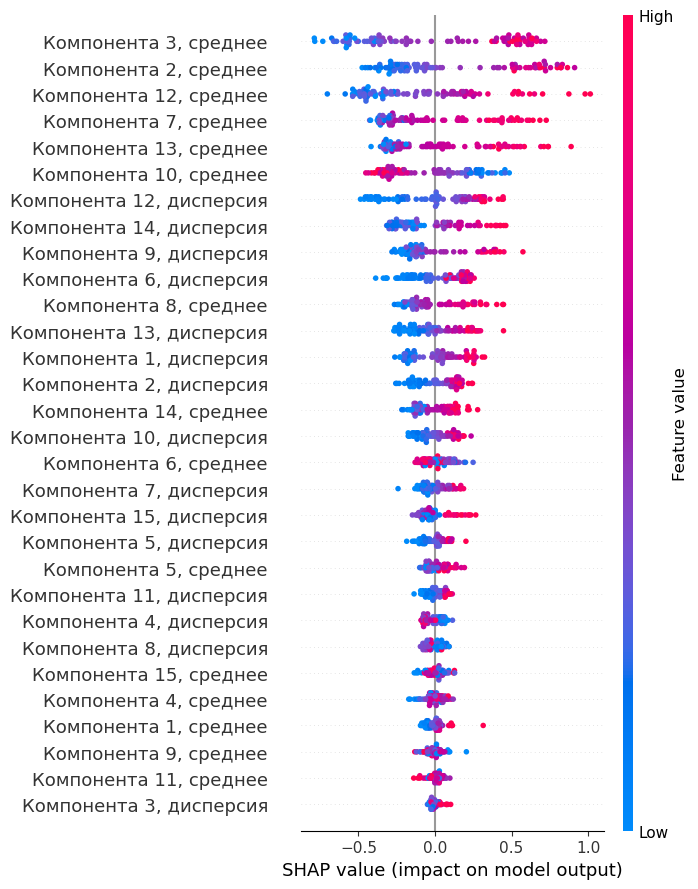

In [34]:
shap.summary_plot(shap_values[class_index], X_test, plot_type='dot',
                      feature_names=feature_names, plot_size=(7,9), max_display=30)

##### К следующему спец. семинару:

- Восстановить динамику проекций по ЭЭГ
- Построить график зависимости точности от числа top-N компонент
- Сопоставить с 46 фонемами
- Модифицировать нейтральную фразу так, чтобы придать ей эмоцию.